# Setup

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import utils.plot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from utils.model import get_cleaned_data

# EDA

In [2]:
df = get_cleaned_data("data/kickstarter_projects.csv")
df.head(2)

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [3]:
df.shape

(374853, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           374853 non-null  int64 
 1   name         374853 non-null  object
 2   category     374853 non-null  object
 3   subcategory  374853 non-null  object
 4   country      374853 non-null  object
 5   launched     374853 non-null  object
 6   deadline     374853 non-null  object
 7   goal         374853 non-null  int64 
 8   pledged      374853 non-null  int64 
 9   backers      374853 non-null  int64 
 10  state        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [5]:
df.describe()

,id,goal,pledged,backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [6]:
df.isna().sum()

id             0
name           0
category       0
subcategory    0
country        0
launched       0
deadline       0
goal           0
pledged        0
backers        0
state          0
dtype: int64

In [7]:
#Check unique values of categorical variables
print("\n\n", df.category.nunique(), "Unique values of Category : \n", pd.DataFrame({'Count': df.category.value_counts(), 'Percentage : ': round(df.category.value_counts(normalize=True)*100,1)}))
print("\n\n", df.subcategory.nunique(), "Unique values of Sub-Category : \n", pd.DataFrame({'Count': df.subcategory.value_counts(), 'Percentage : ': round(df.subcategory.value_counts(normalize=True)*100,1)}))
print("\n\n", df.country.nunique(), "Unique values of Country : \n", pd.DataFrame({'Count': df.country.value_counts(), 'Percentage : ': round(df.country.value_counts(normalize=True)*100,1)}))
print("\n\n", df.state.nunique(), "Unique values of State : \n", pd.DataFrame({'Count': df.state.value_counts(), 'Percentage : ': round(df.state.value_counts(normalize=True)*100,1)}))



 15 Unique values of Category : 
               Count  Percentage : 
category                          
Film & Video  62694           16.7
Music         49529           13.2
Publishing    39378           10.5
Games         35225            9.4
Technology    32562            8.7
Design        30065            8.0
Art           28151            7.5
Food          24599            6.6
Fashion       22812            6.1
Theater       10911            2.9
Comics        10819            2.9
Photography   10778            2.9
Crafts         8809            2.3
Journalism     4754            1.3
Dance          3767            1.0


 159 Unique values of Sub-Category : 
                  Count  Percentage : 
subcategory                          
Product Design   22310            6.0
Documentary      16138            4.3
Tabletop Games   14178            3.8
Music            13339            3.6
Shorts           12357            3.3
...                ...            ...
Residencies         69  

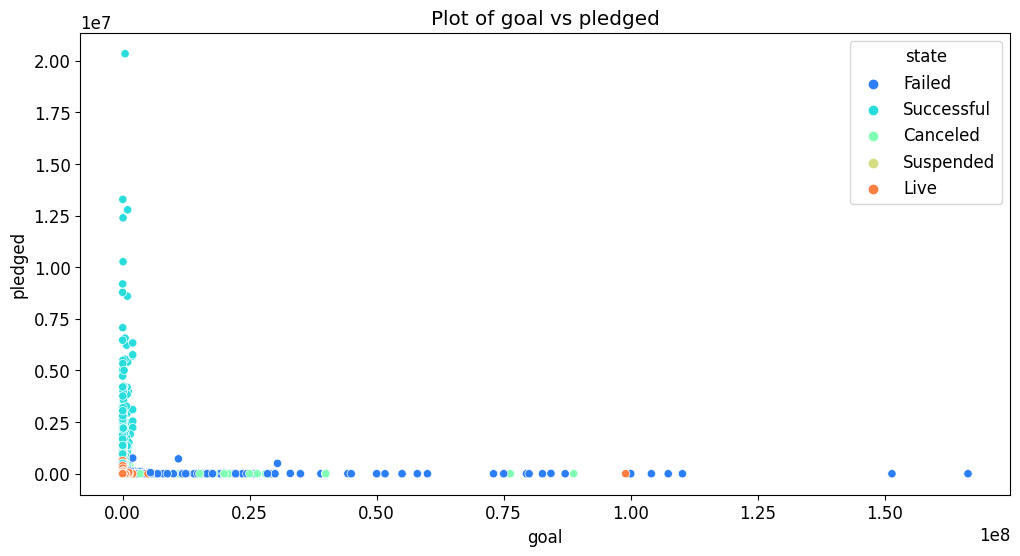

In [8]:
plot.scatter(df ,'goal', 'pledged', 'state', "goal", "pledged")
#Higher goals are Cancelled or Unsucessful

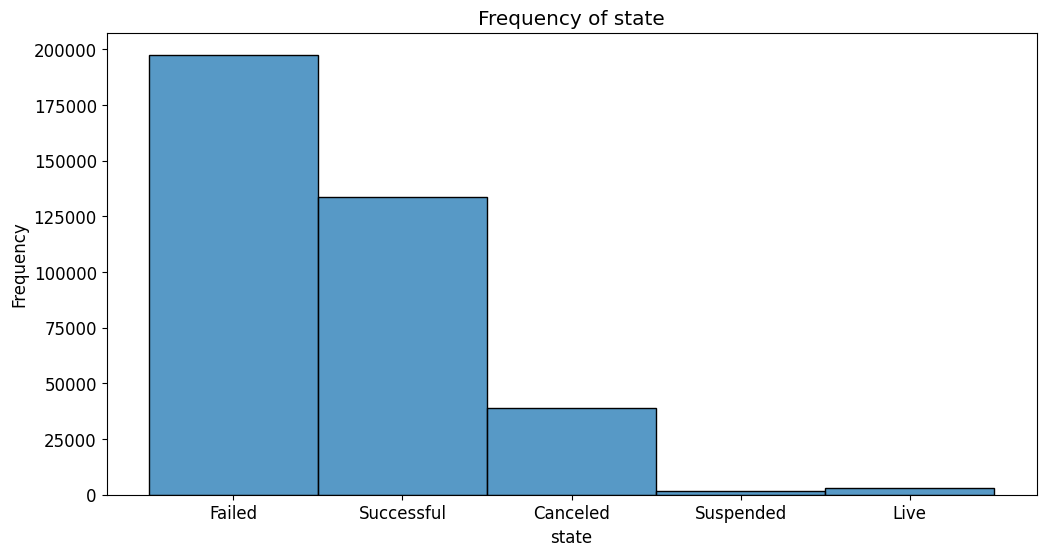

In [9]:
plot.histogram(df,'state', 'state')

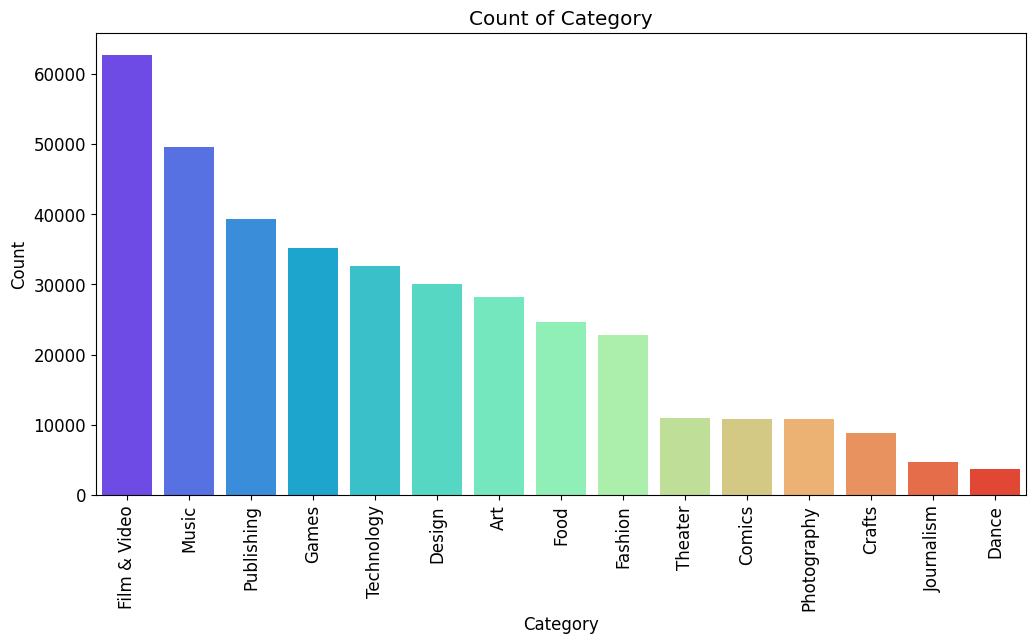

In [11]:
# explore categories split
plot.countplot(df, x="category", xtitle="Category")

In [12]:
pd.set_option('display.max_rows', None)
pd.crosstab(df['subcategory'], df['category'])

category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
subcategory,,,,,,,,,,,,,,,
3D Printing,0,0,0,0,0,0,0,0,0,0,0,0,0,682,0
Academic,0,0,0,0,0,0,0,0,0,0,0,0,916,0,0
Accessories,0,0,0,0,0,3162,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,740,0,0,0,0,0,0,0,0
Animals,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0
Animation,0,0,0,0,0,0,2541,0,0,0,0,0,0,0,0
Anthologies,0,405,0,0,0,0,0,0,0,0,0,0,379,0,0
Apparel,0,0,0,0,0,7165,0,0,0,0,0,0,0,0,0
Apps,0,0,0,0,0,0,0,0,0,0,0,0,0,6345,0


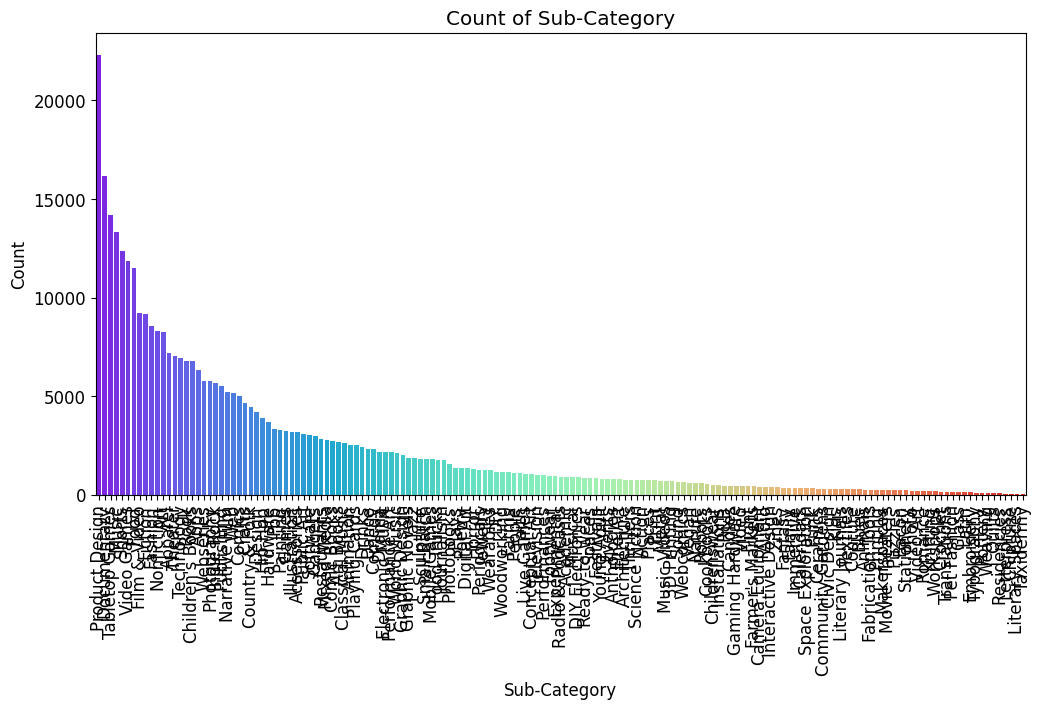

In [13]:
# explore categories split
plot.countplot(df, x="subcategory", xtitle="Sub-Category")

In [14]:
# Create a crosstab
pd.crosstab(df['category'], df['state'])

state,Canceled,Failed,Live,Successful,Suspended
category,,,,,
Art,2221,14130,194,11510,96
Comics,842,4036,76,5842,23
Crafts,843,5703,76,2115,72
Dance,163,1235,18,2338,13
Design,4151,14814,305,10549,246
Fashion,2650,14181,250,5593,138
Film & Video,5742,32891,332,23612,117
Food,2209,15969,183,6085,153
Games,6199,16002,287,12518,219


Chi-square statistic: 21530.794431855447
P-value: 0.0
Degrees of freedom: 56


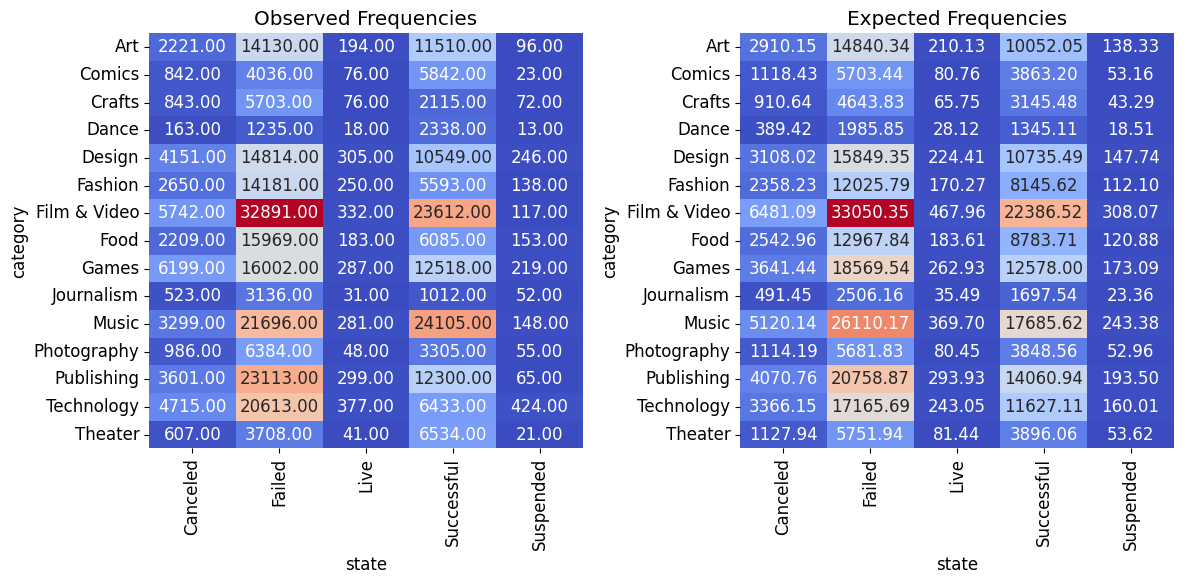

In [15]:
from scipy.stats import chi2_contingency
# Create a crosstab
crosstab = pd.crosstab(df['category'], df['state'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
#print("Expected frequencies:", ex)

# Convert expected frequencies to DataFrame for easier plotting
expected_df = pd.DataFrame(ex, index=crosstab.index, columns=crosstab.columns)

# Format annotations to avoid scientific notation
def format_annotation(val):
    return f"{val:.2f}"

# Plot the observed frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(crosstab, annot=crosstab.applymap(format_annotation), fmt='', cmap='coolwarm', cbar=False)
plt.title('Observed Frequencies')

# Plot the expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=expected_df.applymap(format_annotation), fmt='', cmap='coolwarm', cbar=False)
plt.title('Expected Frequencies')

plt.tight_layout()
plt.show()

state           Canceled  Failed  Live  Successful  Suspended   Total   
country                                                                 
Australia           1065    4606    70        2010         88    7839  \
Austria               91     378    15         107          6     597   
Belgium               74     371    12         152          8     617   
Canada              2138    8236   132        4134        116   14756   
Denmark              157     566    16         360         14    1113   
France               353    1612    52         908         14    2939   
Germany              621    2499    75         937         39    4171   
Hong Kong             87     261    35         216         19     618   
Ireland              110     476    11         207          7     811   
Italy                406    1930    76         439         27    2878   
Japan                  8      16     9           7          0      40   
Luxembourg             4      38     1          19 

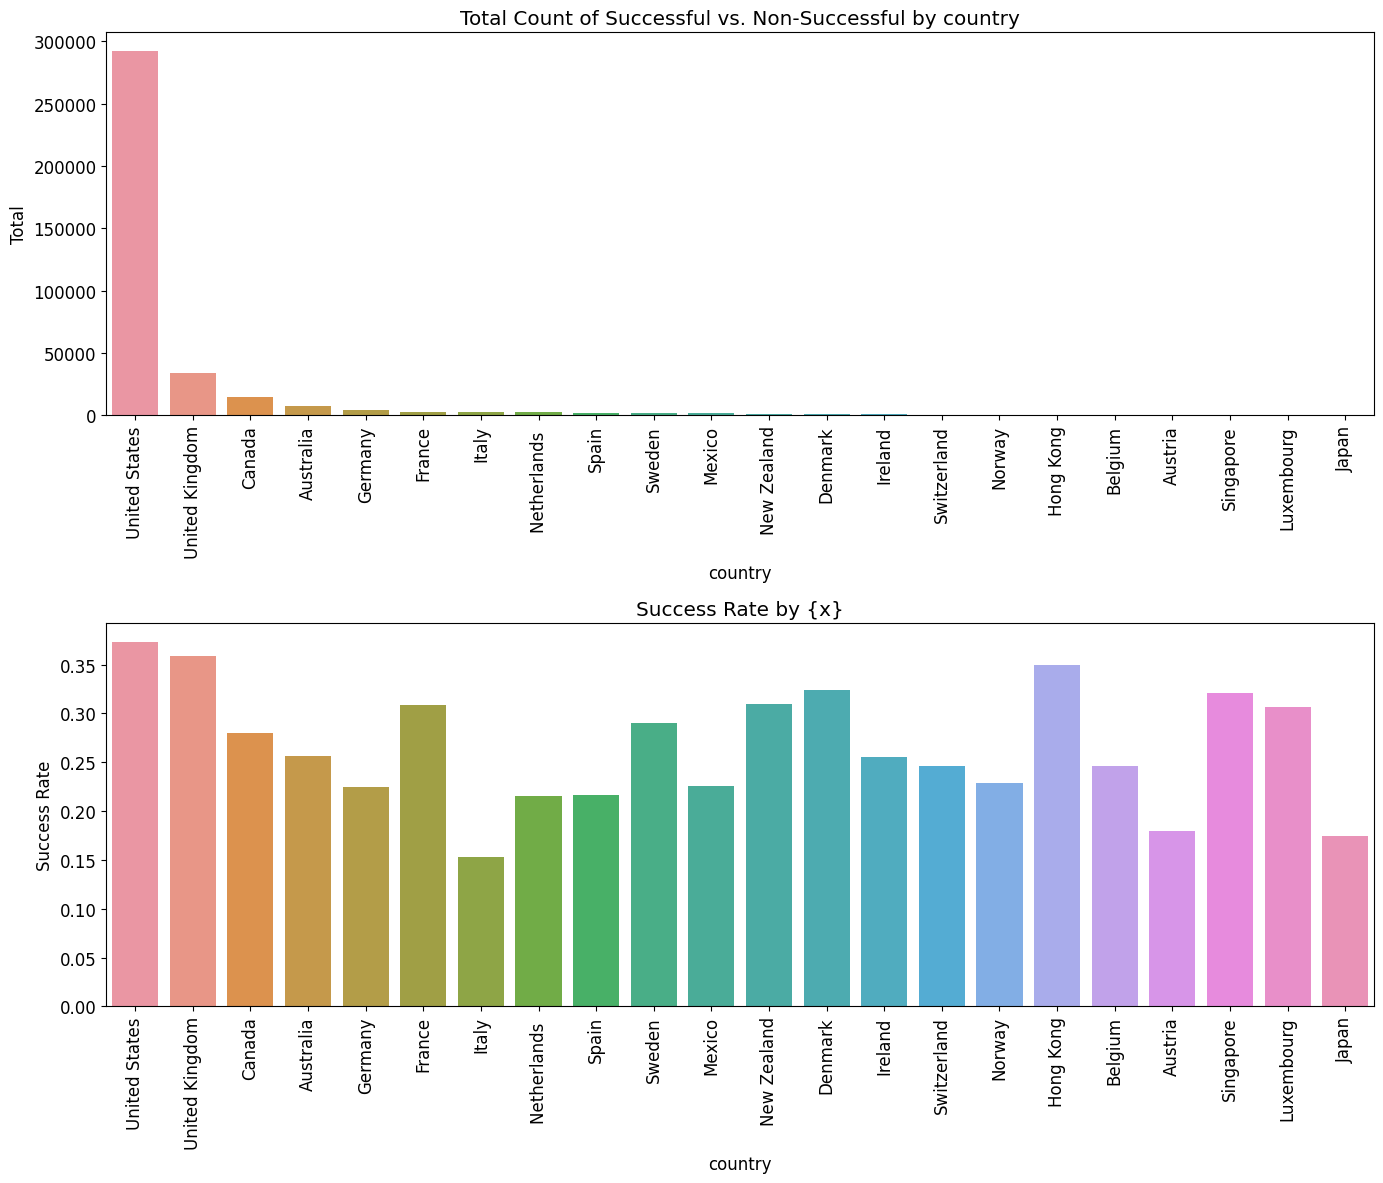

In [17]:
plot.bar_count_percent(df, 'country', 'state')

state         Canceled  Failed  Live  Successful  Suspended  Total   
category                                                             
Art               2221   14130   194       11510         96  28151  \
Comics             842    4036    76        5842         23  10819   
Crafts             843    5703    76        2115         72   8809   
Dance              163    1235    18        2338         13   3767   
Design            4151   14814   305       10549        246  30065   
Fashion           2650   14181   250        5593        138  22812   
Film & Video      5742   32891   332       23612        117  62694   
Food              2209   15969   183        6085        153  24599   
Games             6199   16002   287       12518        219  35225   
Journalism         523    3136    31        1012         52   4754   
Music             3299   21696   281       24105        148  49529   
Photography        986    6384    48        3305         55  10778   
Publishing        36

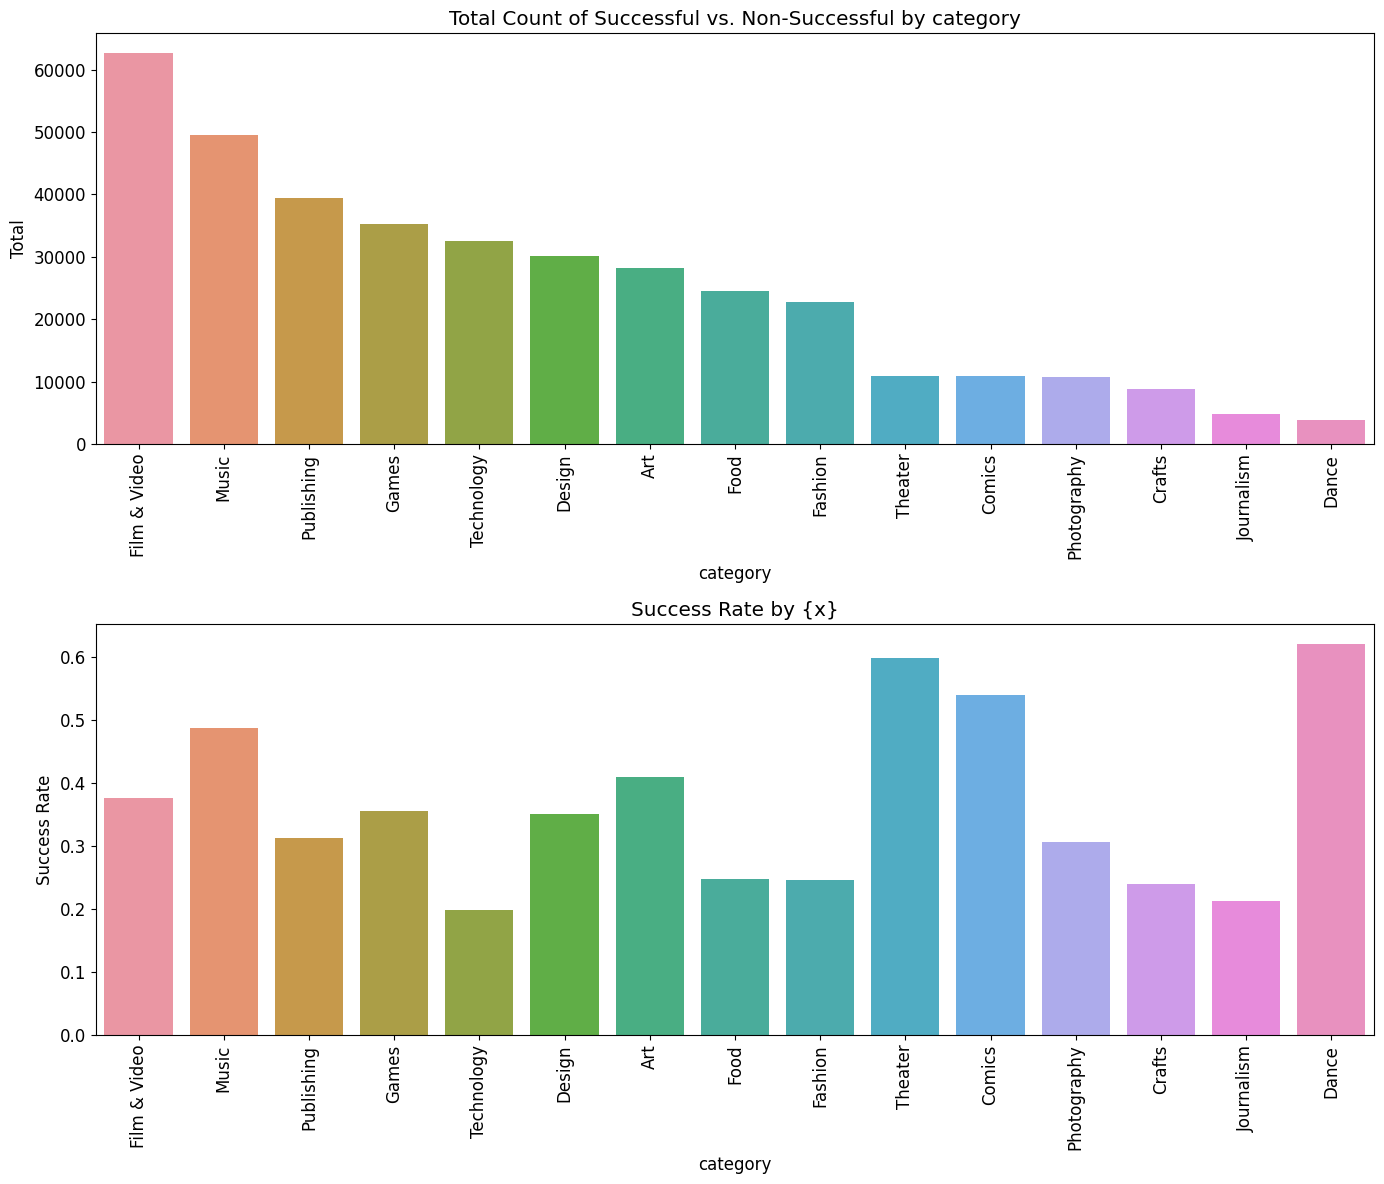

In [18]:
plot.bar_count_percent(df, 'category', 'state')